
Merged Data with Revenue:
   QUANTITYORDERED  PRICEEACH  TOTALREVENUE
0               30      95.70       2871.00
1               34      81.35       2765.90
2               41      94.74       3884.34
3               45      83.26       3746.70
4               49     100.00       4900.00

Pivot Table (Revenue by State & Status):
STATUS         Cancelled  Disputed  In Process   On Hold  Resolved     Shipped
STATE                                                                         
BC                   0.0      0.00        0.00      0.00       0.0   132090.24
CA                   0.0      0.00     5328.00  47965.99   35761.9  1155935.22
CT                   0.0      0.00        0.00      0.00       0.0   190115.82
Isle of Wight        0.0      0.00        0.00      0.00       0.0    73170.13
MA                   0.0      0.00        0.00  44166.21       0.0   516968.28
NH                   0.0      0.00        0.00      0.00       0.0   101428.50
NJ                   0.0      0.00 

C:\Users\darsh\AppData\Local\Temp\ipykernel_14100\1002888029.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_df, x="DEALSIZE", y="TOTALREVENUE", estimator=sum, ci=None)


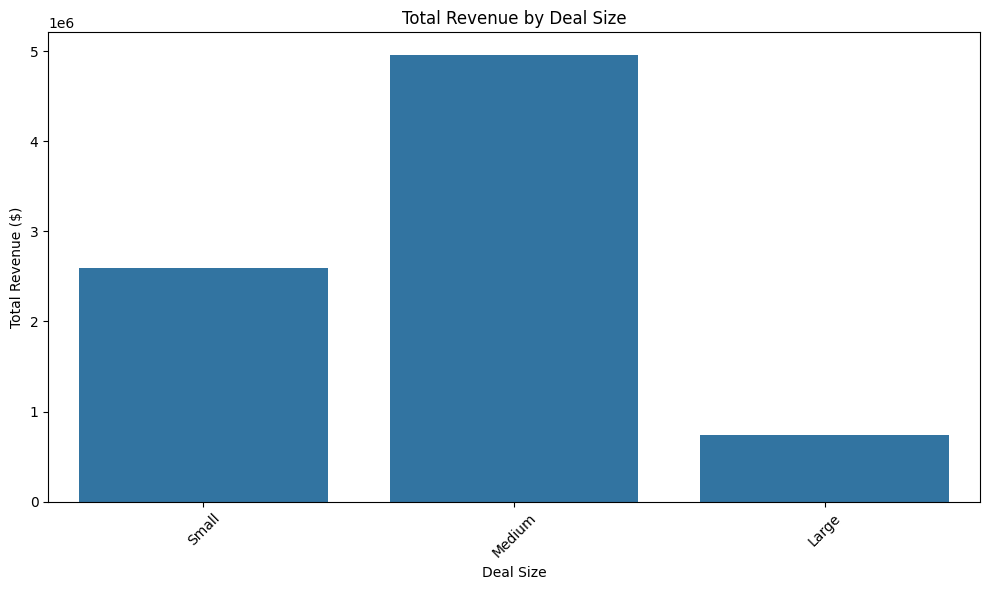

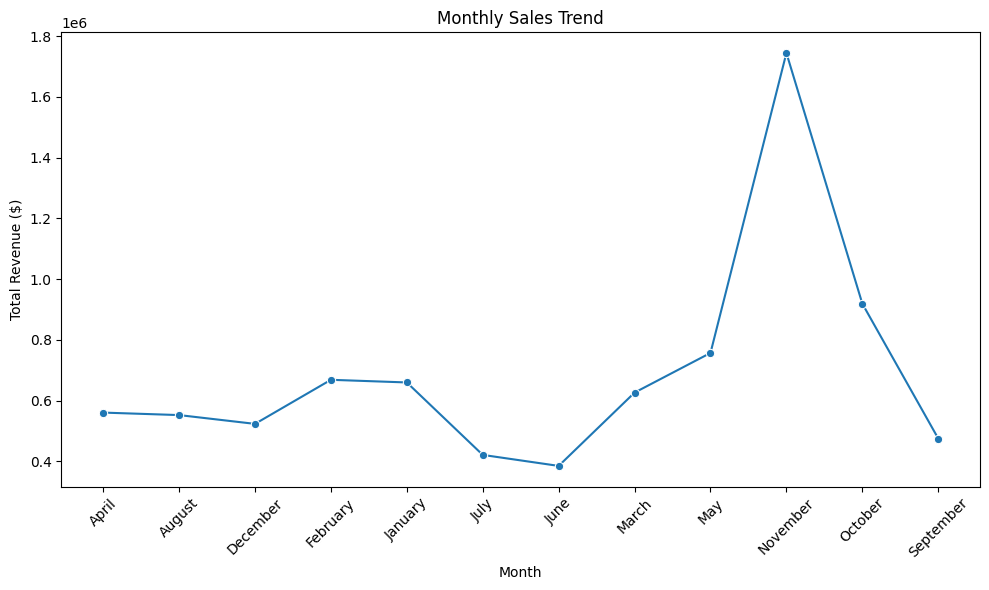

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
sales_df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv")

# Clean column names
sales_df.columns = sales_df.columns.str.strip().str.upper()
customers_df.columns = customers_df.columns.str.strip().str.upper()
products_df.columns = products_df.columns.str.strip().str.upper()

# Drop duplicates
sales_df.drop_duplicates(inplace=True)

# Fill missing quantity (fixed warning)
sales_df["QUANTITYORDERED"] = sales_df["QUANTITYORDERED"].fillna(0)

# Convert ORDERDATE to datetime
sales_df["ORDERDATE"] = pd.to_datetime(sales_df["ORDERDATE"], errors='coerce')

# Merge if a valid matching key exists (ensure this key exists in both)
# Uncomment and edit if there's a common key:
# sales_df = pd.merge(sales_df, customers_df, on="CUSTOMERNAME", how="left")

# Compute total revenue (fallback using PRICEEACH)
sales_df["TOTALREVENUE"] = sales_df["QUANTITYORDERED"] * sales_df["PRICEEACH"]

print("\nMerged Data with Revenue:")
print(sales_df[["QUANTITYORDERED", "PRICEEACH", "TOTALREVENUE"]].head())

# Create PivotTable
if "STATE" in sales_df.columns and "STATUS" in sales_df.columns:
    pivot_table = pd.pivot_table(
        sales_df,
        values="TOTALREVENUE",
        index="STATE",
        columns="STATUS",
        aggfunc="sum",
        fill_value=0
    )
    print("\nPivot Table (Revenue by State & Status):")
    print(pivot_table)
else:
    print("\nSkipping pivot table. Required columns not found.")

# Bar Chart: Total Revenue by Deal Size
if "DEALSIZE" in sales_df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_df, x="DEALSIZE", y="TOTALREVENUE", estimator=sum, ci=None)
    plt.title("Total Revenue by Deal Size")
    plt.xlabel("Deal Size")
    plt.ylabel("Total Revenue ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping bar chart. DEALSIZE column not found.")

# Line Chart: Monthly Sales Trend
if "ORDERDATE" in sales_df.columns:
    sales_df["MONTH"] = sales_df["ORDERDATE"].dt.month_name()
    monthly_sales = sales_df.groupby("MONTH")["TOTALREVENUE"].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_sales, x="MONTH", y="TOTALREVENUE", marker="o")
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping line chart. ORDERDATE column not found.")


In [3]:
# Save the processed data to a new CSV file
sales_df.to_csv("Updated_processed_sales_data.csv.csv", index=False)
print("\nProcessed data saved to 'Updated_processed_sales_data.csv'.")


Processed data saved to 'Updated_processed_sales_data.csv'.
